# Model to accurately forecast inventory demand based on historical sales data. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import time
import random
import pickle

## Load training data 
The size of the training data is quite large (~4 GB). Large datasets require significant amount of memory to process. Instead, we will sample the data randomly for our initial data analysis and visualization. 

In [14]:
def load_samp_data(filename='train.csv', columns=[], noop=1):
    """ 
      Function returns a dataframe containing the training data sampled randomly. 
      The data is also stored in a pickle file for later processing.
    """
    
    if not noop:
        inputfile = open('train_samp_data.pkl', 'rb')
        data = pickle.load(inputfile)
        inputfile.close()
        return data
    
    chunksize= 10 ** 6
    datasize = 74180464 #datasize = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
    samplesize = 10 ** 2 # samples per chunk of data read from the file.
    
    data = pd.DataFrame([],columns=columns)
    chunks = pd.read_csv(filename, iterator=True, chunksize=chunksize)
    for chunk in chunks:
        chunk.columns = columns
        data = data.append(chunk.sample(samplesize)) 
    
    # write data to a pickle file.
    outputfile = open('train_samp_data.pkl','wb')
    pickle.dump(data,outputfile)
    outputfile.close()
    
    return data
 
noop = 0
columns = ['week_num', 'sales_depot_id', 'sales_chan_id', 'route_id', 'client id', 'prod_id', 'saleunit_curr_wk', 'saleamt_curr_wk', 'retunit_next_week', 'retamt_next_wk', 'y_pred_demand']
tic = time.time()
train_data_samp = load_samp_data('train.csv', columns, noop)
toc = time.time()
print '**'
print 'Time to load: ', toc-tic, 'sec'
print 
print train_data_samp.describe()
print '**'

**
Time to load:  0.0157389640808 sec

          week_num  sales_depot_id  sales_chan_id     route_id     client id  \
count  7500.000000     7500.000000    7500.000000  7500.000000  7.500000e+03   
mean      5.981867     2750.273600       1.380933  2106.925067  1.812736e+06   
std       2.026611     4577.723938       1.479318  1486.055140  1.831767e+06   
min       3.000000     1110.000000       1.000000     1.000000  2.886000e+03   
25%       4.000000     1312.000000       1.000000  1160.000000  3.650522e+05   
50%       6.000000     1615.000000       1.000000  1278.500000  1.203706e+06   
75%       8.000000     2043.000000       1.000000  2802.000000  2.373755e+06   
max       9.000000    25759.000000      11.000000  8061.000000  9.718416e+06   

            prod_id  saleunit_curr_wk  saleamt_curr_wk  retunit_next_week  \
count   7500.000000       7500.000000      7500.000000        7500.000000   
mean   20902.744933          7.369733        67.369300           0.127733   
std    18

## Data Visualization
Analyze clustering effects (if any....)

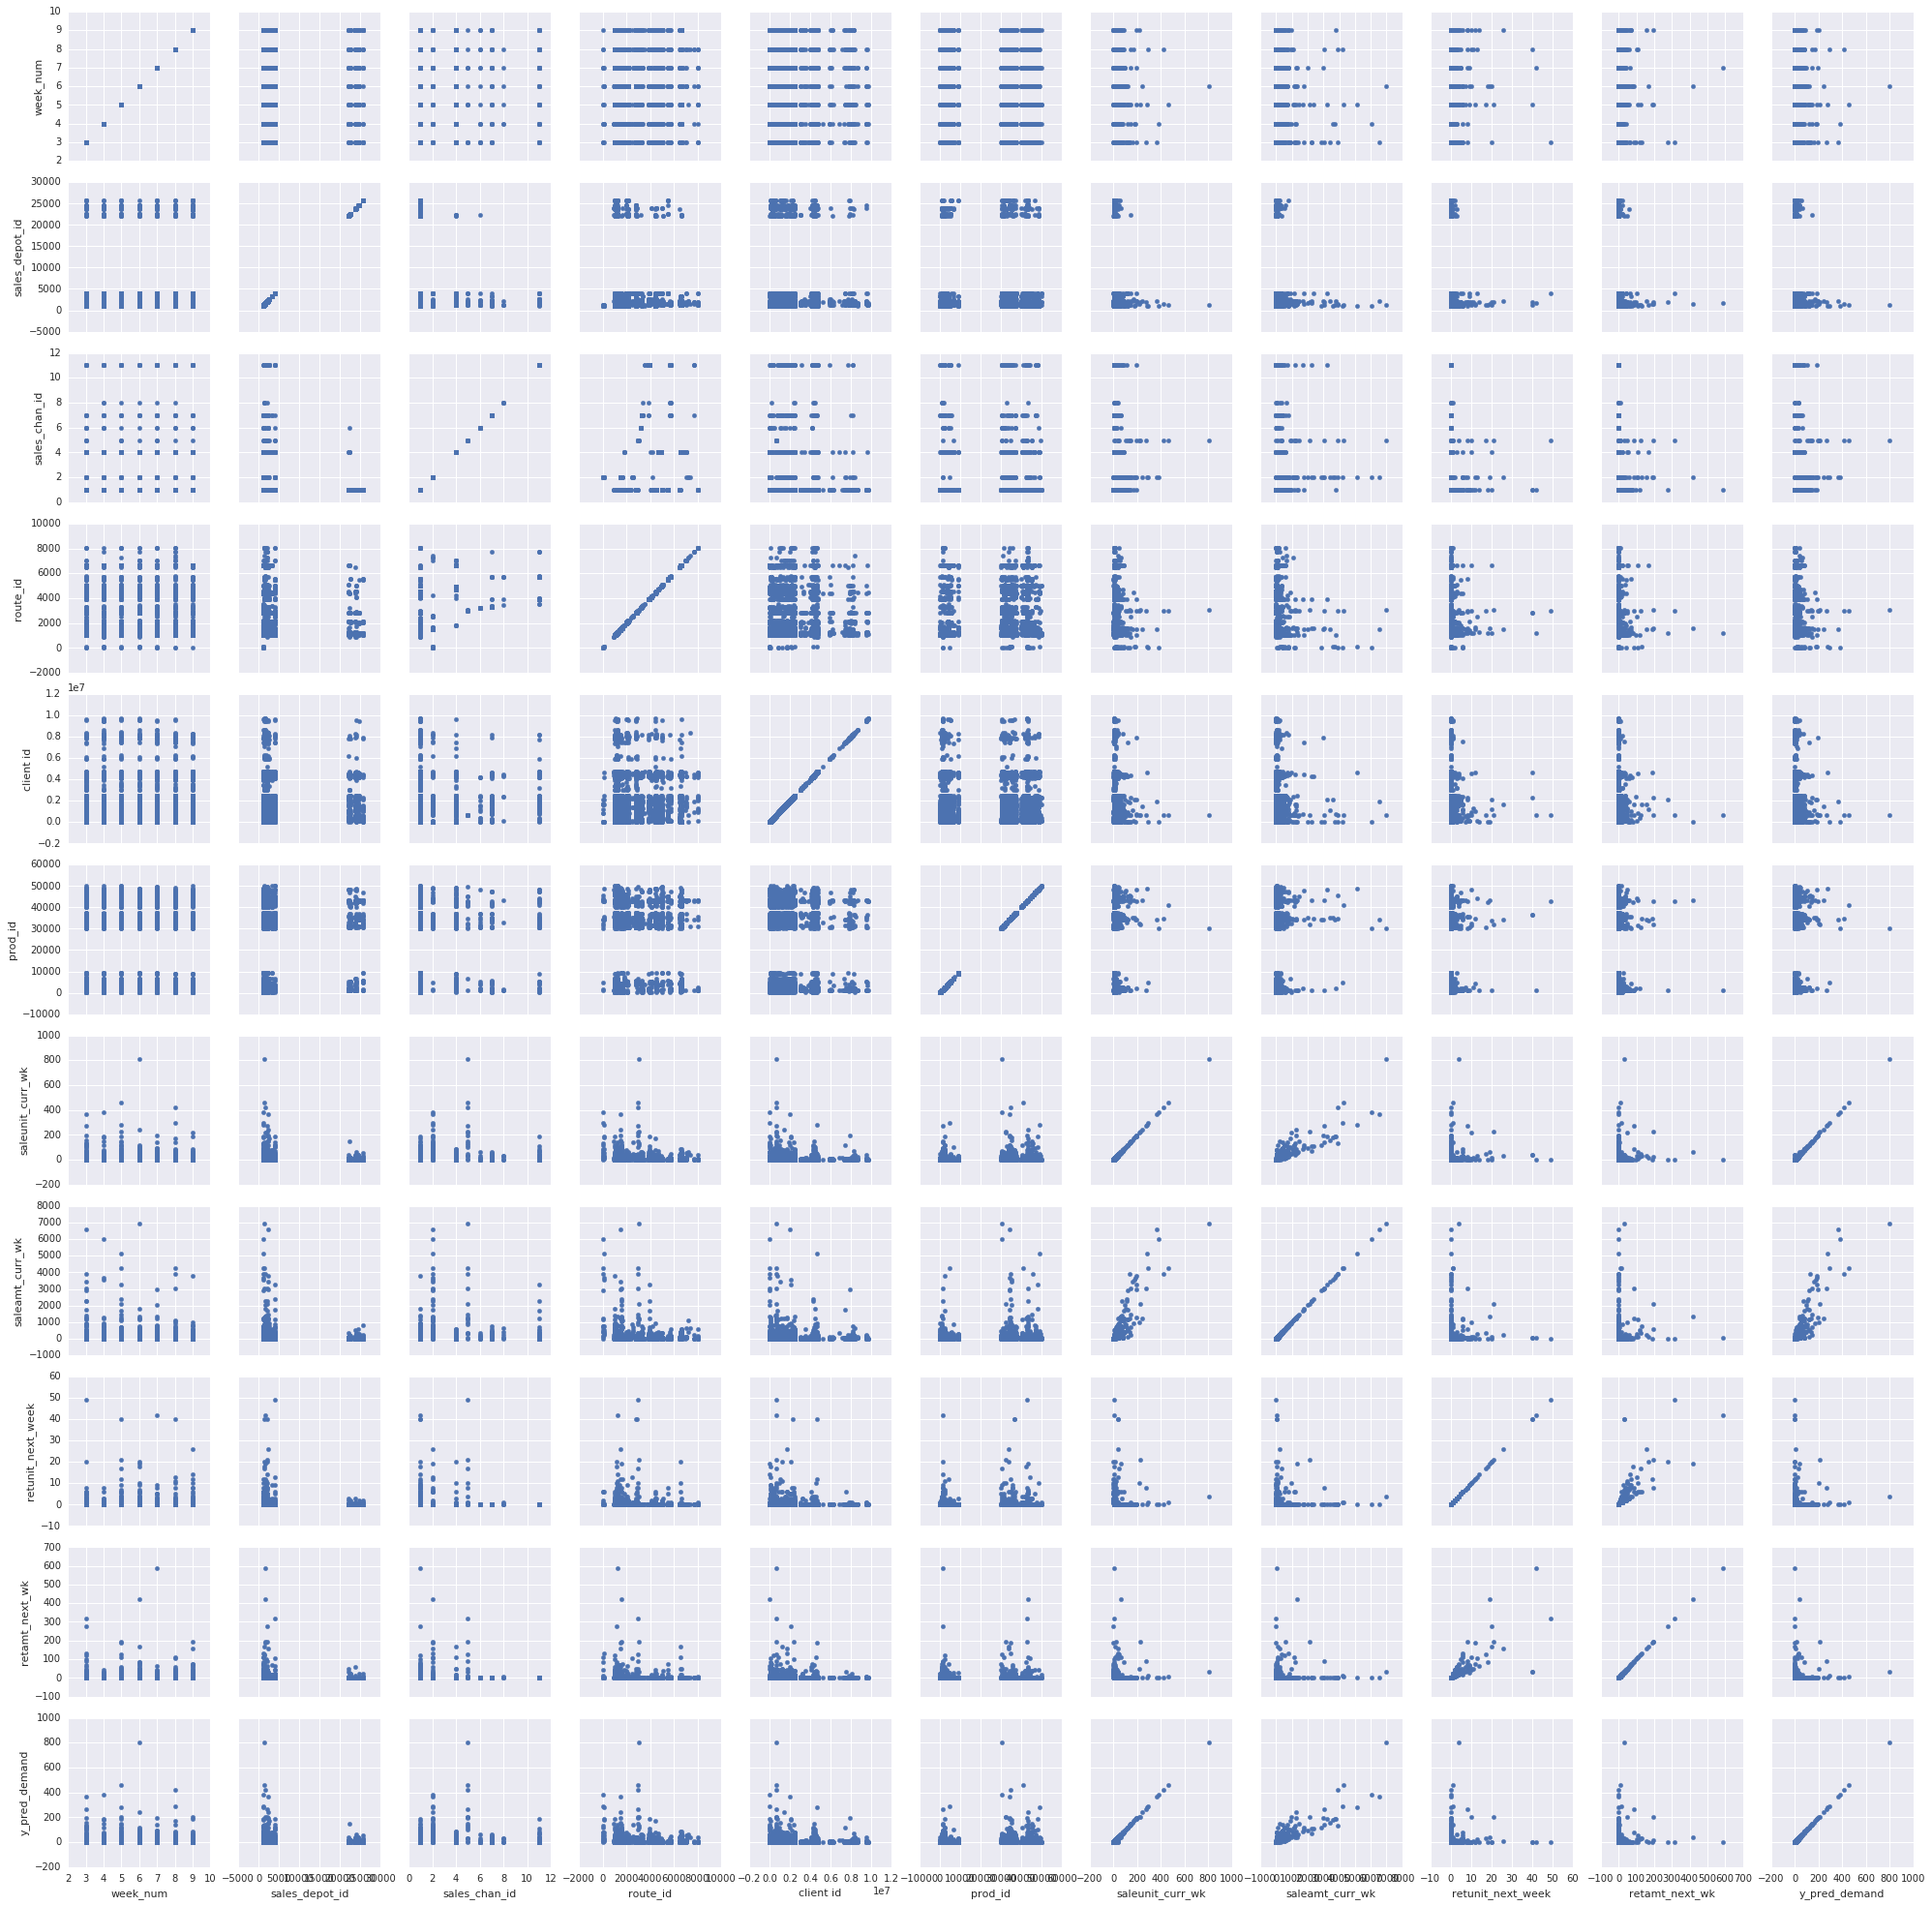

In [15]:
g = sns.PairGrid(train_data_samp)
g.map(plt.scatter)

Large datasets require significant amount of memory. Instead of loading the entire training data into memory, we use a subset of training data which is sampled uniformly at random for our initial data analysis and visualization. 

In [ ]:
startt = time.time()
datasize = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
endt = time.time()
print endt-startt

In [ ]:
datasize = 74180464
samplesize = 5000


data_train.columns = ['week_num', 'sales_depot_id', 'sales_chan_id', 'route_id', 'client id', 'prod_id', 'saleunit_curr_wk', 'saleamt_curr_wk', 'retunit_next_week', 'retamt_next_wk', 'y_pred_demand']
data_test = pd.read_csv('test.csv', nrows=100)
data_test.columns = ['id', 'week_num', 'sales_depot_id', 'sales_chan_id', 'route_id', 'client id', 'prod_id']
data_test.head()

In [ ]:
g = sns.PairGrid(data_t)
g.map(plt.scatter)

In [ ]:
chunksize= 10 ** 6
datasize = 0
startt = time.time()
for chunk in pd.read_csv(filename, chunksize=chunksize):
    datasize = datasize + len(chunk)
    

    
endt = time.time()
del chunk
print 'time: ', endt-startt, '(sec), datasize: ', datasize

datasize = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(xrange(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pandas.read_csv(filename, skiprows=skip)



In [ ]:
Feature Analysis: Investigate the feature vector space.